                                    K MEANS CLUSTERING                          

K-Means is a machine learning model used to solve the unspervised problems.

K-means clustering is a widely used algorithm in unsupervised machine learning for partitioning a dataset into groups (or clusters). It is based on grouping data points that are similar to each other and separating them from points in other clusters. The goal is to minimize the variance within each cluster.

Key Concepts of K-Means:-
- Cluster: A collection of data points that are similar to each other.
- Centroid: The center of a cluster, typically the mean of all points in the cluster.
- Objective: The K-means algorithm tries to partition data into kk clusters such that the total sum of squared differences between the data points and their corresponding cluster centroids is minimized.


K-Means Algorithm Construction:-

The K-means algorithm works iteratively to assign each data point to one of kk clusters and then updates the cluster centroids based on these assignments. The process is repeated until convergence, meaning that the cluster assignments no longer change.

The algorithm follows these steps:
1. Initialization -> 
- Select the number of clusters kk: We need to decide how many clusters we want. This is a hyperparameter that you need to specify before running the algorithm.

- Initialize cluster centroids: we need to initialize k centroids. There are different ways to initialize these centroids:
    - Random Initialization: Choose k random data points from the dataset as the initial centroids.
    - K-Means++: A more advanced initialization method that spreads out the initial centroids to improve the algorithm's convergence and reduce the chances of poor clustering.

2. Assignment Step ->
For each data point, assign it to the nearest centroid. The distance between a data point and a centroid is typically measured using the Euclidean distance (though other distance metrics can be used as well). 
- Mathematically, the distance between a point xi and a centroid cj​ is given by:
    - d(xi,cj)= √∑(xi,m − cj,m)^2
    - where 
        - xi​ is the ithith data point, 
        - cj​ is the jthjth centroid, 
        - n is the number of features (dimensions) in the data.

Each point is assigned to the cluster with the nearest centroid.

3. Update Step ->
Once the assignment step is completed, the centroids need to be updated. The new centroid for each cluster is computed as the mean of all the data points that are assigned to that cluster:
- cjnew=1/|Cj| ∑ ▼i∈C▼j xi
- where 
    - Cj​ is the set of points assigned to cluster j, 
    - |Cj| is the number of points in cluster jj.

4. Convergence Check
- After updating the centroids, check whether the centroids have changed from the previous iteration. If the centroids remain the same (or changes are minimal), the algorithm has converged.
- If not, repeat the Assignment Step and Update Step iteratively until convergence.


Mathematical Objective: Minimizing the Within-Cluster Sum of Squares

The goal of K-means is to minimize the sum of squared distances between the data points and their assigned centroids. This is often referred to as the within-cluster sum of squares (WCSS):
- J = k^ ∑ ▼j=1 ∑ ▼xi∈Cj ||xi−cj||^2
- where:
    - k is the number of clusters,
    - Cj​ is the set of points assigned to the jthjth cluster,
    - cj​ is the centroid of the jthjth cluster,
    - xi​ is a data point in cluster CjCj​.

The algorithm minimizes this objective function by adjusting the cluster assignments and centroids.


Key Points and Considerations:-

- Choice of k: The value of k must be chosen before running the algorithm, but there are methods to help determine an optimal k, such as the Elbow Method or Silhouette Score.

- Initialization Sensitivity: K-means is sensitive to the initial placement of centroids. Poor initialization can lead to suboptimal clustering results, which is why K-means++ is often preferred over random initialization.

- Convergence: The algorithm is guaranteed to converge, but it may not always find the global minimum (i.e., the optimal clustering). The final result can depend on the initial choice of centroids.

- Scalability: K-means can be computationally efficient for large datasets, especially if the number of features is not very high. However, the algorithm's time complexity is roughly O(n⋅k⋅t)O(n⋅k⋅t), where nn is the number of data points, kk is the number of clusters, and tt is the number of iterations.

- Cluster Shape Assumption: K-means assumes that clusters are spherical and have similar sizes. It may struggle with clusters that have non-spherical shapes, varying densities, or overlapping areas.



Example: Walkthrough of the K-Means Algorithm:

Consider a simple 2D dataset with 6 points:
Points: (1,1),(2,2),(3,3),(6,6),(7,7),(8,8)
Points: (1,1),(2,2),(3,3),(6,6),(7,7),(8,8)

Let's say we choose k=2k=2 (2 clusters).

1. Initialization: Randomly select two centroids, say, (1,1)(1,1) and (8,8)(8,8).

2. First Assignment:
    - Point (1,1)(1,1) is closer to centroid (1,1)(1,1), so it’s assigned to cluster 1.
    - Point (2,2)(2,2) is closer to centroid (1,1)(1,1), so it’s assigned to cluster 1.
    - Point (3,3)(3,3) is closer to centroid (1,1)(1,1), so it’s assigned to cluster 1.
    - Point (6,6)(6,6) is closer to centroid (8,8)(8,8), so it’s assigned to cluster 2.
    - Point (7,7)(7,7) is closer to centroid (8,8)(8,8), so it’s assigned to cluster 2.
    - Point (8,8)(8,8) is closer to centroid (8,8)(8,8), so it’s assigned to cluster 2.

3. Update Centroids:
    - New centroid of cluster 1: (1,1)+(2,2)+(3,3)3=(2,2)3(1,1)+(2,2)+(3,3)​=(2,2)
    - New centroid of cluster 2: (6,6)+(7,7)+(8,8)3=(7,7)3(6,6)+(7,7)+(8,8)​=(7,7)

4. Second Assignment: Assign points to the new centroids.
    - Point (1,1)(1,1) is closer to (2,2)(2,2), so it’s assigned to cluster 1.
    - Point (2,2)(2,2) is closer to (2,2)(2,2), so it’s assigned to cluster 1.
    - Point (3,3)(3,3) is closer to (2,2)(2,2), so it’s assigned to cluster 1.
    - Point (6,6)(6,6) is closer to (7,7)(7,7), so it’s assigned to cluster 2.
    - Point (7,7)(7,7) is closer to (7,7)(7,7), so it’s assigned to cluster 2.
    - Point (8,8)(8,8) is closer to (7,7)(7,7), so it’s assigned to cluster 2.

5. Check Convergence: The centroids haven’t changed after the second iteration, so the algorithm stops.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [4]:
raw_data = pd.read_csv(r"S:\VS code\python\Data _Analytics\Dataset\Wholesale customers data.csv")
raw_data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
raw_data.notnull().count()

Channel             440
Region              440
Fresh               440
Milk                440
Grocery             440
Frozen              440
Detergents_Paper    440
Delicassen          440
dtype: int64

In [7]:
raw_data.shape

(440, 8)

In [8]:
raw_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
raw_data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

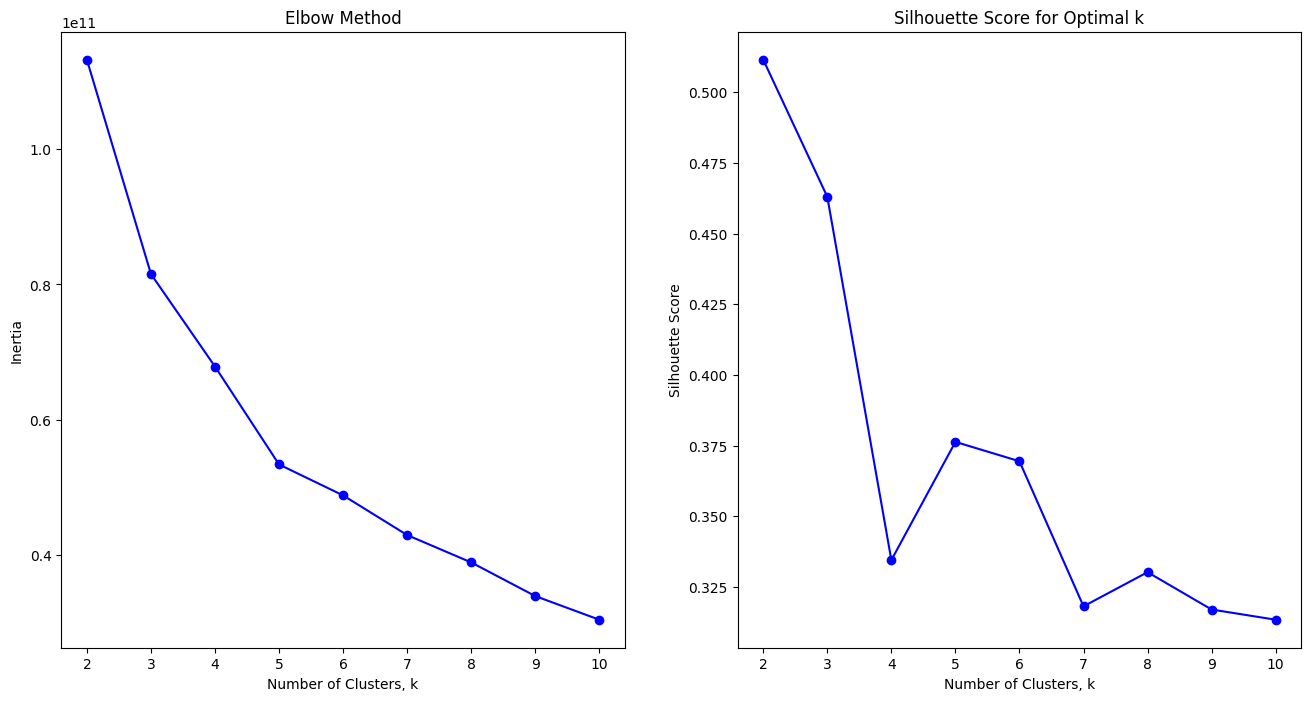

In [10]:
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(raw_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(metrics.silhouette_score(raw_data, kmeans.labels_))

# The Elbow Method
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# The Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')

plt.show()

In [11]:
K_Mean_Model = KMeans(n_clusters=2, random_state=42)
K_Mean_Model.fit(raw_data)

KMeans(n_clusters=2, random_state=42)

In [12]:
raw_data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [13]:
datasetToPredicate = pd.DataFrame(columns=[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']], data=[[1,3,10290,1981,2232,1038,168,2125], [2,3,6353,8808,7684,2405,3516,7844], [3, 4, 6523, 7856, 2654, 3576, 7568, 8546]])
datasetToPredicate

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,10290,1981,2232,1038,168,2125
1,2,3,6353,8808,7684,2405,3516,7844
2,3,4,6523,7856,2654,3576,7568,8546


In [14]:
predication = K_Mean_Model.predict(datasetToPredicate)
predication

c:\Users\SUMIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0, 0, 0])

In [15]:
print(metrics.silhouette_score(raw_data, K_Mean_Model.labels_))

0.5115333882980367
